In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

plt.style.use('ggplot')

In [255]:
results = pd.read_csv("/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/gwgm-ca-run-results-Oct1.csv")

In [256]:
def get_cluster_results(clusterId):
    return results[results.clusterId == clusterId]

def remove_outiers(df):
    Q1 = df['duration'].quantile(0.25)
    Q3 = df['duration'].quantile(0.75)
    IQR = Q3 - Q1

    #Values between Q1-1.5IQR and Q3+1.5IQR
    return df.query('(@Q1 - 1.5 * @IQR) <= duration <= (@Q3 + 1.5 * @IQR)')

def get_qn(qn, df, r=True):
    q = df[df.queryName.str.contains(qn)]
    if r:
        return remove_outiers(q)
    else:
        return q

In [257]:
gm_default = get_cluster_results("j-2KONORTYS0CUG")
gw_default = get_cluster_results("j-16UW0FDHI16TV")
gm_match = get_cluster_results("j-3E3KPNGKVFRTK")
gw_match = get_cluster_results("j-HK05V75VYI20")

# gm = gm_default
# gw = gw_default

gm = gm_match
gw = gw_match
# gw_yearly_partitioned = getClusterResults(results.clusterId == "j-HK05V75VYI20"])
# gw_monthly = results[results.clusterId == "j-Q7HFJZY0XFJD"]
# gm_monthly = results[results.clusterId == "j-26TWWX470OI8U"]
# gw_yearly_partitioned = results[results.clusterId == "j-HK05V75VYI20"]
# gm_yearly = results[results.clusterId == "j-3E3KPNGKVFRTK"]

In [290]:
# gw.head(4
get_qn("GDELT-IN-CITY-BUFFERS-six-MONTHS", gw_default, False)["result"].describe()

count    4.862000e+03
mean     1.116187e+05
std      2.770074e+05
min      9.900000e+01
25%      1.349900e+04
50%      3.724800e+04
75%      9.628500e+04
max      3.269820e+06
Name: result, dtype: float64

In [38]:
pd.concat([get_qn(qn, gw_results), get_qn(qn, gm_results)]).to_csv(result_path(qn + ".csv"))

In [245]:
# Durations
gw_default_durations = gw_default[['queryName', "duration", "result"]].rename(columns = { "duration": "gw_default_duration"})
gw_default_durations["gw_default_ttfr"] = gw_default['timeAtFirstResult'] - gw_default['startTime']

gm_default_durations = gm_default[['queryName', "duration"]].rename(columns = { "duration": "gm_default_duration"})
gm_default_durations["gm_default_ttfr"] = gm_default['timeAtFirstResult'] - gm_default['startTime']

gw_match_durations = gw_match[['queryName', "duration"]].rename(columns = { "duration": "gw_match_duration"})
gw_match_durations["gw_match_ttfr"] = gw_match['timeAtFirstResult'] - gw_match['startTime']

gm_match_durations = gm_match[['queryName', "duration"]].rename(columns = { "duration": "gm_match_duration"})
gm_match_durations["gm_match_ttfr"] = gm_match['timeAtFirstResult'] - gm_match['startTime']

# gw_durations = gw_yearly_partitioned[['queryName', "duration"]].rename(columns = { "duration": "gw_yearly_partitioned_duration"})
# gw_durations["gw_yearly_partitioned_ttfr"] = gw_yearly_partitioned['timeAtFirstResult'] - gw_yearly_partitioned['startTime']

# gm_durations = gm_yearly[['queryName', "duration"]].rename(columns = { "duration": "gm_yearly_duration"})
# gm_durations["gm_yearly_ttfr"] = gm_yearly['timeAtFirstResult'] - gm_yearly['startTime']

# Time to first results
# gw_monthly_ttfr = gw_monthly[['queryName']].copy()
# gw_monthly_ttfr["gw_monthly_ttfr"] = gw_monthly['timeAtFirstResult'] - gw_monthly['startTime']

# gm_monthly_ttfr = gm_monthly[['queryName']].copy()
# gm_monthly_ttfr["gm_monthly_ttfr"] = gm_monthly['timeAtFirstResult'] - gm_monthly['startTime']

# gw_yearly_partitioned_ttfr = gw_yearly_partitioned[['queryName']].copy()
# gw_yearly_partitioned_ttfr["gw_yearly_partitioned_ttfr"] = gw_yearly_partitioned['timeAtFirstResult'] - gw_yearly_partitioned['startTime']

# gm_yearly_ttfr = gm_yearly[['queryName']].copy()
# gm_yearly_ttfr["gm_yearly_ttfr"] = gm_yearly['timeAtFirstResult'] - gm_yearly['startTime']

In [77]:
print(gm_yearly_durations.count())
print(gw_monthly[gw_monthly.queryName.str.contains("CITY-BUFFERS")].count())
print(gm_monthly[gm_monthly.queryName.str.contains("CITY-BUFFERS")].count())
print(gw_yearly_partitioned[gw_yearly_partitioned.queryName.str.contains("CITY-BUFFERS")].count())
print(gm_yearly[gm_yearly.queryName.str.contains("CITY-BUFFERS")].count())
print(14092+17352+17352+14092)
print(62888*4)

NameError: name 'gm_yearly_durations' is not defined

In [27]:
gw_match_durations.head(3)


,queryName,gw_match_duration,result,gw_match_ttfr
10,GDELT-IN-SOUTH-AMERICA-COUNTRIES-THREE-WEEKS-2...,141,1925,101
18,GDELT-IN-SOUTH-AMERICA-COUNTRIES-THREE-WEEKS-2...,67,100,63
22,GDELT-IN-CITY-BUFFERS-six-MONTHS-2013-Oslo-650-KM,479,17918,77


In [246]:
df_slices = [gw_default_durations.groupby("queryName").aggregate(np.mean).reset_index(),
             gm_default_durations.groupby("queryName").aggregate(np.mean).reset_index(),
             gw_match_durations.groupby("queryName").aggregate(np.mean).reset_index(),
             gm_match_durations.groupby("queryName").aggregate(np.mean).reset_index()]

# df_slices = [gw_durations.groupby("queryName").aggregate(np.mean).reset_index(),
#              gm_durations.groupby("queryName").aggregate(np.mean).reset_index()]

# print("EACH COUNT:")
# for df in df_slices:
#     print(df.count())
#     print(df["queryName"].unique().shape)
    
# print("Single merge count:")
# sm = pd.merge(df_slices[0].set_index("queryName"), df_slices[1].set_index("queryName"), on="queryName")
# print(sm.count())
# print(sm["queryName"].unique().shape)
    
combined = reduce(lambda x, y: pd.merge(x, y, on="queryName"), df_slices)
print("COMBINED COUNT")
print(combined.count())
# combined = combined[["queryName", "result", 
#                      "gw_monthly_duration", "gw_yearly_partitioned_duration",
#                      "gm_monthly_duration", "gm_yearly_duration",
#                      "gw_monthly_ttfr", "gw_yearly_partitioned_ttfr",
#                      "gm_monthly_ttfr", "gm_yearly_ttfr"]]
combined = combined[["queryName", "result", 
                     "gm_default_duration", "gw_default_duration",
                     "gm_match_duration", "gw_match_duration",
                     "gm_default_ttfr", "gw_default_ttfr",
                     "gm_match_ttfr", "gw_match_ttfr"]]

combined = combined[combined.queryName.str.contains("CITY-BUFFERS")]


COMBINED COUNT
queryName              8092
gw_default_duration    8092
result                 8092
gw_default_ttfr        8092
gm_default_duration    8092
gm_default_ttfr        8092
gw_match_duration      8092
gw_match_ttfr          8092
gm_match_duration      8092
gm_match_ttfr          8092
dtype: int64


In [247]:
# Labels the query for time, in days
def label_time(row):
    qn = row['queryName'].upper()
    if "FOURTEEN-MONTHS" in qn:
        return 14 * 28
    if "TEN-MONTHS" in qn:
        return 10 * 28
    if "SIX-MONTHS" in qn:
        return 6 * 28
    if "TWO-MONTHS" in qn:
        return 2 * 28
    if "TWO-WEEKS" in qn:
        return 2 * 7
    if "SIX-DAYS" in qn:
        return 6
    
def label_time_desc(row):
    qn = row['queryName'].upper()
    if "FOURTEEN-MONTHS" in qn:
        return "FOURTEEN-MONTHS"
    if "TEN-MONTHS" in qn:
        return "TEN-MONTHS"
    if "SIX-MONTHS" in qn:
        return "SIX-MONTHS"
    if "TWO-MONTHS" in qn:
        return "TWO-MONTHS"
    if "TWO-WEEKS" in qn:
        return "TWO-WEEKS"
    if "SIX-DAYS" in qn:
        return "SIX-DAYS"
    
def label_df_time(df):
    df['days'] = df.apply(label_time, axis=1)
    return df

def label_df_time_desc(df):
    df['time_desc'] = df.apply(label_time_desc, axis=1)
    return df

label_df_time(combined)
#combined['days'] = combined.apply(label_time, axis=1)    

,queryName,result,gm_default_duration,gw_default_duration,gm_match_duration,gw_match_duration,gm_default_ttfr,gw_default_ttfr,gm_match_ttfr,gw_match_ttfr,days
0,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Baghdad-10-KM,245.0,89.666667,73.666667,55.500000,43.750000,38.000000,68.666667,40.500000,37.250000,6
1,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Baghdad-15...,519.0,100.000000,153.250000,80.666667,100.333333,81.000000,143.750000,70.333333,80.000000,6
2,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Baghdad-25...,533.0,197.333333,195.666667,207.000000,217.500000,93.666667,186.333333,115.000000,109.500000,6
3,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Baghdad-35...,566.0,101.250000,231.500000,94.000000,179.500000,71.250000,221.750000,73.000000,153.000000,6
4,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Baghdad-45...,598.0,328.000000,591.333333,235.500000,251.000000,121.666667,581.333333,100.500000,224.000000,6
5,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Baghdad-50-KM,245.0,49.000000,98.000000,46.000000,61.000000,37.000000,93.666667,41.333333,52.333333,6
6,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Baghdad-55...,648.0,1414.250000,145.000000,61.333333,125.666667,50.000000,127.000000,50.333333,97.000000,6
7,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Baghdad-65...,806.0,1890.750000,199.250000,102.000000,138.000000,79.500000,155.750000,73.666667,114.666667,6
8,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Beijing-10-KM,540.0,66.250000,78.000000,43.333333,71.333333,33.000000,68.750000,28.000000,39.333333,6
9,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Beijing-15...,540.0,314.666667,150.000000,69.666667,107.666667,61.000000,132.000000,62.666667,71.000000,6


In [248]:
# Labels the query for size, in km
def label_size(row):
    qn = row['queryName'].upper()
    sizes = [10, 50, 150, 250, 350, 450, 550, 650]
    sizes.reverse()
    for size in sizes:
        if "%d-KM" % size in qn:
            return size
        
def label_df_size(df):
    df['size'] = df.apply(label_size, axis=1) 
    return df
    
label_df_size(combined)
# combined.apply(label_size, axis=1).unique() 
# combined['size'] = combined.apply(label_size, axis=1) 

,queryName,result,gm_default_duration,gw_default_duration,gm_match_duration,gw_match_duration,gm_default_ttfr,gw_default_ttfr,gm_match_ttfr,gw_match_ttfr,days,size
0,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Baghdad-10-KM,245.0,89.666667,73.666667,55.500000,43.750000,38.000000,68.666667,40.500000,37.250000,6,10
1,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Baghdad-15...,519.0,100.000000,153.250000,80.666667,100.333333,81.000000,143.750000,70.333333,80.000000,6,150
2,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Baghdad-25...,533.0,197.333333,195.666667,207.000000,217.500000,93.666667,186.333333,115.000000,109.500000,6,250
3,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Baghdad-35...,566.0,101.250000,231.500000,94.000000,179.500000,71.250000,221.750000,73.000000,153.000000,6,350
4,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Baghdad-45...,598.0,328.000000,591.333333,235.500000,251.000000,121.666667,581.333333,100.500000,224.000000,6,450
5,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Baghdad-50-KM,245.0,49.000000,98.000000,46.000000,61.000000,37.000000,93.666667,41.333333,52.333333,6,50
6,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Baghdad-55...,648.0,1414.250000,145.000000,61.333333,125.666667,50.000000,127.000000,50.333333,97.000000,6,550
7,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Baghdad-65...,806.0,1890.750000,199.250000,102.000000,138.000000,79.500000,155.750000,73.666667,114.666667,6,650
8,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Beijing-10-KM,540.0,66.250000,78.000000,43.333333,71.333333,33.000000,68.750000,28.000000,39.333333,6,10
9,GDELT-IN-CITY-BUFFERS-SIX-DAYS-2000-Beijing-15...,540.0,314.666667,150.000000,69.666667,107.666667,61.000000,132.000000,62.666667,71.000000,6,150


In [249]:
# assign groups based on time and size
unique_size_times = map(tuple, combined[["size", "days"]].drop_duplicates(subset=['size','days']).values)
groups = dict([(y, x) for (x, y) in enumerate(unique_size_times)])
group_idxs = {v: k for k, v in groups.items()}
def label_group(row):
    return groups[(row['size'], row['days'])]


combined['group'] = combined.apply(label_group, axis=1) 

In [250]:
# Establish groups to bins
#for group in groups.values():
groups_to_ranges = { }
total_ranges = None

#grouped_by_result_quantiles = None
grouped_by_result_quantiles = combined.copy()

# # This does the quantiles per group
# for group in groups.values():
#     print(group)
#     df = combined[combined.group == group]
#     ranges = pd.qcut(df.result, 10)
#     groups_to_ranges[group] = ranges.unique()
#     df['range_group'] = pd.qcut(df.result, 10, labels=False)
#     #print(df.dtypes)
#     #print("OK")
#     if grouped_by_result_quantiles is None:
#         grouped_by_result_quantiles = df
#     else:
#         grouped_by_result_quantiles = grouped_by_result_quantiles.append(df)
   

total_ranges = pd.qcut(combined.result, 30,retbins=True)[1]
print(total_ranges)
#total_ranges = ranges.unique()
grouped_by_result_quantiles['range_group'] = pd.qcut(combined.result, 30, labels=False)


# df.head(3)
# bins = np.linspace(df.result.min(), df.result.max(), 10)

# def label_bin(row):
#     return np.digitize(row.result, bins)




[  0.00000000e+00   7.33000000e+01   1.76200000e+02   2.93900000e+02
   4.49000000e+02   6.20000000e+02   8.05800000e+02   1.05300000e+03
   1.33200000e+03   1.69870000e+03   2.10200000e+03   2.55930000e+03
   3.03120000e+03   3.66960000e+03   4.49440000e+03   5.40150000e+03
   6.72620000e+03   8.09520000e+03   9.64020000e+03   1.19215000e+04
   1.47070000e+04   1.84316000e+04   2.30210000e+04   2.86638000e+04
   3.62390000e+04   4.34835000e+04   5.88134000e+04   8.28016000e+04
   1.17982800e+05   2.21103700e+05   3.26982000e+06]


In [41]:
# grouped_by_result_quantiles.to_csv("/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/gwgm-ca-run-results-Sept27-result-groups.csv")
# grouped_by_result_quantiles = pd.read_csv("/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/gwgm-ca-run-results-Sept27-result-groups.csv")

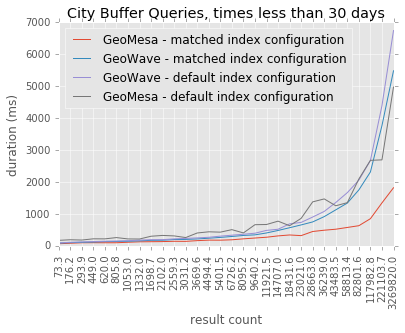

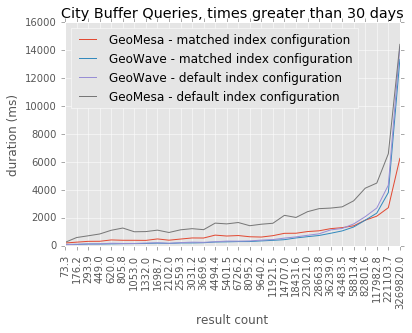

In [254]:
# only_matched = grouped_by_result_quantiles[["result", "group", "range_group",
#                     "gw_yearly_partitioned_duration",
#                     "gm_yearly_duration"]]

def plot_for_group(group, save=True):
    group_by_three = grouped_by_result_quantiles[grouped_by_result_quantiles.group == group].groupby(["range_group"])
    gbt_agg = group_by_three.aggregate(np.mean)
    # print(gbt_agg.dtypes)

    # ranges = groups_to_ranges[group]
    ranges = total_ranges
    xticks = list(map(str, list(ranges[1:])))
    print(xticks)
    (size, days) = group_idxs[group]
    title = "City Buffer Queries, over 10 cities: %d km, %d days" % (size, days)
    
#     (fig, (ax, ax2)) = plt.subplots(nrows=2, sharey=False, sharex=True)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('result count')
    ax.set_ylabel('duration (ms)')
    plot_columns = { "gw_yearly_partitioned_duration" : "GeoWave",
                     "gm_yearly_duration" : "GeoMesa" }
    gbt_agg[list(plot_columns.keys())].rename(columns = plot_columns).plot.line(ax = ax, title=title)
    
#     fig2 = plt.figure(2)
#     ax2 = fig2.add_subplot(111)
#     ax2.set_xlabel('result count')
#     ax2.set_ylabel('time to first result (ms)')  
#     plot_columns2 = { "gw_yearly_partitioned_ttfr": "GeoWave", "gm_yearly_ttfr": "GeoMesa"}
#     gbt_agg[list(plot_columns2.keys())].rename(columns = plot_columns2).plot.line(ax = ax2, legend = False)
    
    plt.xticks(range(0, 30), xticks, rotation='vertical')
    plt.show()
    if save:
        path = "/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/pngset/%03d-km-%03d-days.png" % (size, days)
        fig.savefig(path, dpi=300, bbox_inches='tight')
        

def plot_for_size(size, save=True):
    grouped_for_plot = grouped_by_result_quantiles[grouped_by_result_quantiles['size'] == size].groupby(["range_group"])
    gbt_agg = grouped_for_plot.aggregate(np.mean)
    # print(gbt_agg.dtypes)

    # ranges = groups_to_ranges[group]
    ranges = total_ranges
    xticks = list(map(str, list(ranges[1:])))
    # print(xticks)
    title = "City Buffer Queries, over 10 cities: %d KM" % size
    
#     (fig, (ax, ax2)) = plt.subplots(nrows=2, sharey=False, sharex=True)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('result count')
    ax.set_ylabel('duration (ms)')
    plot_columns = { "gw_yearly_partitioned_duration" : "GeoWave",
                     "gm_yearly_duration" : "GeoMesa" }
    gbt_agg[list(plot_columns.keys())].rename(columns = plot_columns).plot.line(ax = ax, title=title)
    
#     fig2 = plt.figure(2)
#     ax2 = fig2.add_subplot(111)
    # ax.set_xlabel('result count')
#     ax2.set_ylabel('time to first result (ms)')  
#     plot_columns2 = { "gw_yearly_partitioned_ttfr": "GeoWave", "gm_yearly_ttfr": "GeoMesa"}
#     gbt_agg[list(plot_columns2.keys())].rename(columns = plot_columns2).plot.line(ax = ax2, legend = False)
    
    plt.xticks(range(0, 30), xticks, rotation='vertical')
    
    plt.show()
    if save:
        path = "/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/pngset/%03d-km.png" % size
        fig.savefig(path, dpi=300, bbox_inches='tight')
        
def plot_agg(grouped_agg,
             title,
             fname,
             include_default=True,
             include_match=True,
             range_cap=None,
             save=True):
    ranges = total_ranges
    xticks = list(map(str, list(ranges[1:])))
    
#     (fig, (ax, ax2)) = plt.subplots(nrows=2, sharey=False, sharex=True)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('result count')
    ax.set_ylabel('duration (ms)')
    plot_columns = { }
    if include_default and include_match:
        plot_columns["gw_default_duration"] = "GeoWave - default index configuration"
        plot_columns["gm_default_duration"] = "GeoMesa - default index configuration"
        plot_columns["gw_match_duration"] = "GeoWave - matched index configuration"
        plot_columns["gm_match_duration"] = "GeoMesa - matched index configuration"
    elif include_match:
        plot_columns["gw_match_duration"] = "GeoWave"
        plot_columns["gm_match_duration"] = "GeoMesa"
    else:
        plot_columns["gw_default_duration"] = "GeoWave"
        plot_columns["gm_default_duration"] = "GeoMesa"

    grouped_agg[list(plot_columns.keys())].rename(columns = plot_columns).plot.line(ax = ax, title=title)
    
#     fig2 = plt.figure(2)
#     ax2 = fig2.add_subplot(111)
    # ax.set_xlabel('result count')
#     ax2.set_ylabel('time to first result (ms)')  
#     plot_columns2 = { "gw_yearly_partitioned_ttfr": "GeoWave", "gm_yearly_ttfr": "GeoMesa"}
#     gbt_agg[list(plot_columns2.keys())].rename(columns = plot_columns2).plot.line(ax = ax2, legend = False)

    if not range_cap:
        range_cap = 30
    plt.xticks(range(0, range_cap), xticks, rotation='vertical')
    plt.xlabel("result count")
    plt.show()
    if save:
        path = "/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/pngset/%s.png" % fname
        fig.savefig(path, dpi=300, bbox_inches='tight')  
        
def agg_for_time(days, range_cap = None):
    df = grouped_by_result_quantiles[grouped_by_result_quantiles.days == days]
    if range_cap:
        df = df[df.range_group < range_cap]
    grouped_for_plot = df.groupby(["range_group"])
    
    return grouped_for_plot.aggregate(np.mean)

def agg_for_x(expr, range_cap = None):
    df = grouped_by_result_quantiles[expr]
    if range_cap:
        df = df[df.range_group < range_cap]
    grouped_for_plot = df.groupby(["range_group"])
    
    return grouped_for_plot.aggregate(np.mean)

def agg_for_time_less(days, range_cap = None):
    return agg_for_x(grouped_by_result_quantiles.days < days, range_cap)

def agg_for_time_greater(days, range_cap = None):
    return agg_for_x(grouped_by_result_quantiles.days > days, range_cap)

def agg_for_all(range_cap = None):
    df = grouped_by_result_quantiles
    if range_cap:
        df = df[df.range_group < range_cap]
    grouped_for_plot = df.groupby(["range_group"])
    
    return grouped_for_plot.aggregate(np.mean)

  
     

# plot_for_group(1, save=False)
# for group in groups.values():
#     plot_for_group(group)

# plot_for_time(56, save=False)
# for days in set(map(lambda x: x[1], groups.keys())):
#     range_cap = None
#     # print("Plotting for %d" % days)
#     time_agg = agg_for_time(days, range_cap = range_cap)
#     plot_agg(time_agg, 
#              "City Buffer Queries, over 10 cities: %d days" % days,
#              "%03d-days-matching" % days,
#              include_default = False,
#              include_match = True,
#              range_cap = range_cap,
#              save = True)
# range_cap = None

def plot_for_all(range_cap = 20):
    overall_agg = agg_for_all(range_cap = range_cap)
    plot_agg(overall_agg, 
             "City Buffer Queries, overall",
             "overall-duration-vs-result-both-cap-20",
             include_default = True,
             include_match = True,
             range_cap = range_cap,
             save = True)
    
def plot_for_days_less(range_cap = 20):
    overall_agg = agg_for_time_less(days = 30, range_cap = range_cap)
    plot_agg(overall_agg, 
             "City Buffer Queries, times less than 30 days",
             "lt-30days-duration-vs-result-both-cap-20",
             include_default = True,
             include_match = True,
             range_cap = range_cap,
             save = False)
    
def plot_for_days_greater(range_cap = 20):
    overall_agg = agg_for_time_greater(days = 30, range_cap = range_cap)
    plot_agg(overall_agg, 
             "City Buffer Queries, times greater than 30 days",
             "gt-30days-duration-vs-result-both",
             include_default = True,
             include_match = True,
             range_cap = range_cap,
             save = False)
    
range_cap = None
# plot_for_all(range_cap)
plot_for_days_less(range_cap)
plot_for_days_greater(range_cap)


# plot_for_size(550, save=False)
# print(set(map(lambda x: x[0], groups.keys())))
# for size in set(map(lambda x: x[0], groups.keys())):
#     # print("Plotting for %d" % days)
#     plot_for_size(size)


In [279]:
remove_outliers = False
wd = get_qn("CITY-BUFFER", label_df_time_desc(label_df_time(label_df_size(gw_default.copy()))),remove_outliers)
md = get_qn("CITY-BUFFER", label_df_time_desc(label_df_time(label_df_size(gm_default.copy()))),remove_outliers)

wm = get_qn("CITY-BUFFER", label_df_time_desc(label_df_time(label_df_size(gw_match.copy()))),remove_outliers)
mm = get_qn("CITY-BUFFER", label_df_time_desc(label_df_time(label_df_size(gm_match.copy()))),remove_outliers)


In [118]:
wm

uuid                  object
duration               int64
system                object
timeAtFirstResult      int64
clusterId             object
startTime              int64
endTime                int64
result                 int64
queryName             object
size                 float64
days                 float64
dtype: object

In [126]:
mm[mm.days == 28 * 6]["duration"].describe()
md[md.days == 28 * 6]["duration"].describe()
wm[wm.days == 28 * 6]["duration"].describe()
#wd[wd.days == 28 * 6]["duration"].describe()

wm_sm = wm[(wm.days == 28 * 6) & (wm['size'] == 550.0)]
mm_sm = mm[(mm.days == 28 * 6) & (mm['size'] == 550.0)]

comb = pd.concat([wm_sm, mm_sm])
comb.boxplot(column="duration", by="system")
wm_sm["duration"].describe()


count      433.000000
mean      4669.325635
std       9041.792856
min        169.000000
25%        849.000000
50%       1878.000000
75%       4223.000000
max      64017.000000
Name: duration, dtype: float64

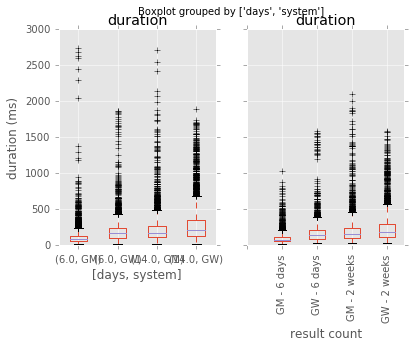

In [155]:
# combd = pd.concat([wd, md])
# combd.boxplot(column="duration", by=["days", "system"])

# combm = pd.concat([wm, mm])
# combm.boxplot(column="duration", by=["days", "system"])


fig, (ax, ax2) = plt.subplots(1, 2, sharey=True)
#ax = fig.add_subplot(111)
ax.set_xlabel('Time')
ax.set_ylabel('duration (ms)')
plot_columns = { }

xticks = ["", "GM - 6 days",
          "GW - 6 days",
          "GM - 2 weeks",
          "GW - 2 weeks"]
#           "GM - 2 months",
#           "GW - 2 months",
#           "GM - 6 months",
#           "GW - 6 months"]
# if include_default and include_match:
#     plot_columns["gw_default_duration"] = "GeoWave - default index configuration"
#     plot_columns["gm_default_duration"] = "GeoMesa - default index configuration"
#     plot_columns["gw_match_duration"] = "GeoWave - matched index configuration"
#     plot_columns["gm_match_duration"] = "GeoMesa - matched index configuration"
# elif include_match:
#     plot_columns["gw_match_duration"] = "GeoWave"
#     plot_columns["gm_match_duration"] = "GeoMesa"
# else:
#     plot_columns["gw_default_duration"] = "GeoWave"
#     plot_columns["gm_default_duration"] = "GeoMesa"

#grouped_agg[list(plot_columns.keys())].rename(columns = plot_columns).plot.line(ax = ax, title=title)

#     fig2 = plt.figure(2)
#     ax2 = fig2.add_subplot(111)
# ax.set_xlabel('result count')
#     ax2.set_ylabel('time to first result (ms)')  
#     plot_columns2 = { "gw_yearly_partitioned_ttfr": "GeoWave", "gm_yearly_ttfr": "GeoMesa"}
#     gbt_agg[list(plot_columns2.keys())].rename(columns = plot_columns2).plot.line(ax = ax2, legend = False)
title = "title"
combd = pd.concat([wd[(wd.days == 6) | (wd.days == 14)], md[(md.days == 6) | (md.days == 14)]])
combd.boxplot(column="duration", by=["days", "system"], ax = ax)

combm = pd.concat([wm[(wm.days == 6) | (wm.days == 14)], mm[(mm.days == 6) | (mm.days == 14)]])
combm.boxplot(column="duration", by=["days", "system"], ax = ax2)

plt.xticks(range(0, len(xticks)), xticks, rotation='vertical')
plt.xlabel("result count")

plt.show()
# wm.boxplot(column="duration", by="days")
# mm.boxplot(column="duration", by="days")
# wd.boxplot(column="duration", by="days")
# md.boxplot(column="duration", by="days")

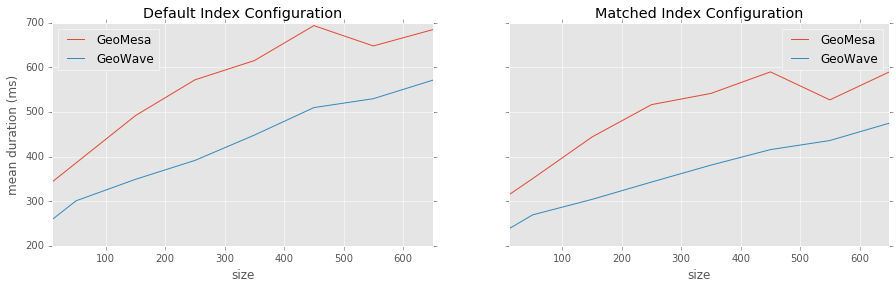

In [253]:
fig, (ax, ax2) = plt.subplots(1, 2, sharey=True)
ax.set_xlabel('result count')
ax.set_ylabel('mean duration (ms)')
plot_columns = { "gw_yearly_partitioned_duration" : "GeoWave",
                 "gm_yearly_duration" : "GeoMesa" }
def agg_df_days(df, name):
    return df.groupby("days").aggregate(np.mean)[["duration"]].rename(columns = {"duration" : name})

def agg_df_size(df, name):
    return df.groupby("size").aggregate(np.mean)[["duration"]].rename(columns = {"duration" : name})

agg_df = agg_df_size

agg_df(md, "GeoMesa").plot(ax = ax)
agg_df(wd, "GeoWave").plot(ax = ax)
ax.set_title("Default Index Configuration")
agg_df(mm, "GeoMesa").plot(ax = ax2)
agg_df(wm, "GeoWave").plot(ax = ax2)
ax2.set_title("Matched Index Configuration")

fig.set_figwidth(15)
plt.show()

save = True
fname = "duration-over-size-default-and-matching"
if save:
    path = "/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/pngset/%s.png" % fname
    fig.savefig(path, dpi=300, bbox_inches='tight')  


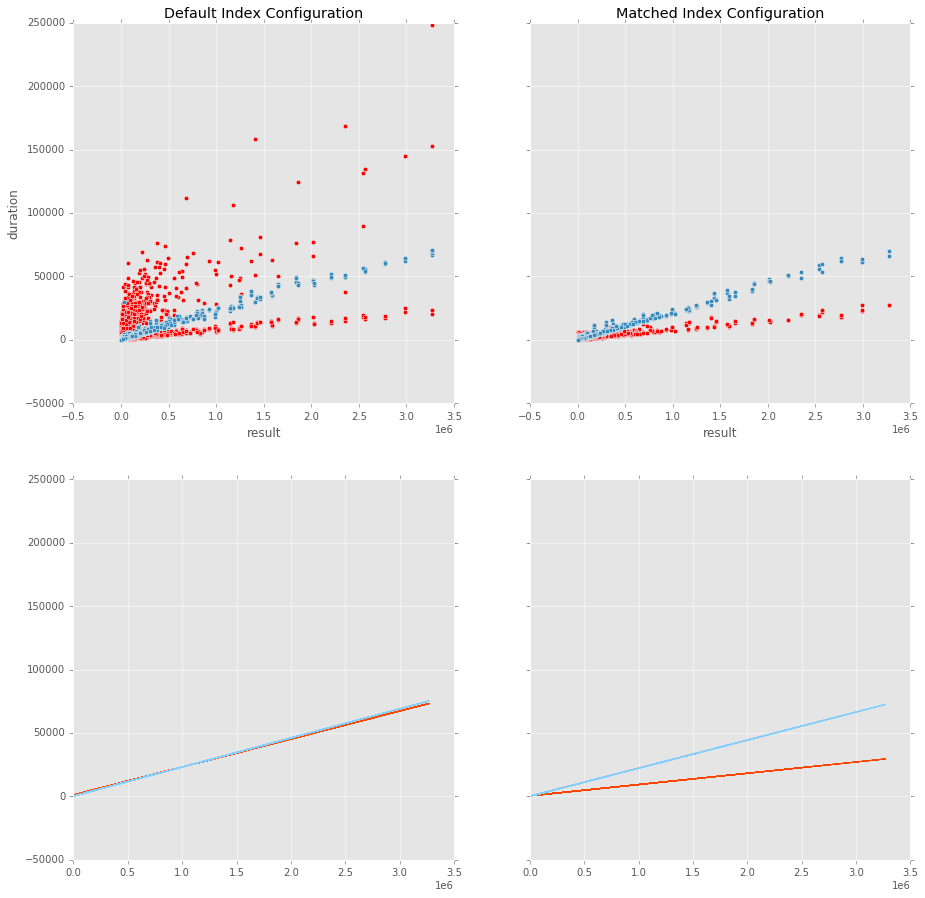

In [287]:
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True)
ax.set_xlabel('result count')
ax.set_ylabel('mean duration (ms)')
plot_columns = { "gw_yearly_partitioned_duration" : "GeoWave",
                 "gm_yearly_duration" : "GeoMesa" }
def agg_df_days(df, name):
    return df.groupby("days").aggregate(np.mean)[["duration"]].rename(columns = {"duration" : name})

def agg_df_size(df, name):
    return df.groupby("size").aggregate(np.mean)[["duration"]].rename(columns = {"duration" : name})

agg_df = agg_df_size

def do_scatter():
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    md.plot.scatter(x="result", y="duration", ax=ax, color="red")
    wd.plot.scatter(x="result", y="duration", ax=ax)

    mm.plot.scatter(x="result", y="duration", ax=ax2, color="red")
    wm.plot.scatter(x="result", y="duration", ax=ax2)
    
def do_regression(sm, sw, ax):
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    mx = sm.result.values.reshape(-1,1)
    my = sm.duration.values.reshape(-1,1)

    regr = linear_model.LinearRegression()
    regr.fit(mx, my)

    mxs = mx
    ax.plot(mxs, regr.predict(mxs), color='orangered', linewidth=1)

    wx = sw.result.values.reshape(-1,1)
    wy = sw.duration.values.reshape(-1,1)

    regr = linear_model.LinearRegression()
    regr.fit(wx, wy)
    wxs = wx
    ax.plot(wxs, regr.predict(wxs), color='lightskyblue', linewidth=1)
    
do_scatter()
do_regression(md, wd, ax3)
do_regression(mm, wm, ax4)

ax.set_title("Default Index Configuration")
ax2.set_title("Matched Index Configuration")

fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()

save = True
fname = "duration-over-result-default-and-matching"
if save:
    path = "/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/pngset/%s.png" % fname
    fig.savefig(path, dpi=300, bbox_inches='tight')  


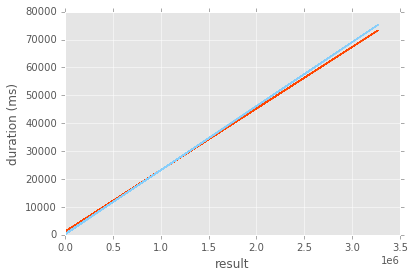

In [275]:
from sklearn import datasets, linear_model

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('result')
ax.set_ylabel('duration (ms)')

m = gm_default[gm_default.queryName.str.contains("CITY-BUFFERS")]
w = gw_default[gw_default.queryName.str.contains("CITY-BUFFERS")]

mm = m[m.result < 1000000]
wm = w[w.result < 1000000]

sm = m
sw = w

# sm = mm
# sw = wm
# sml = mlm

def do_scatter(loose=True):
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    sm.plot.scatter(x="result", y="duration", ax=ax, color="red")
    if loose:
        sml.plot.scatter(x="result", y="duration", ax=ax, color="yellow")
    sw.plot.scatter(x="result", y="duration", ax=ax)


# mm[mm.result < 50000].plot.scatter(x="result", y="duration", ax=ax2, color="red")
# wm[wm.result < 50000].plot.scatter(x="result", y="duration", ax=ax2)

def do_regression(limit=None):
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    mx = sm.result.values.reshape(-1,1)
    my = sm.duration.values.reshape(-1,1)

    regr = linear_model.LinearRegression()
    regr.fit(mx, my)

    mxs = mx
    if limit:
        mxs = np.where(mx < limit)
    plt.plot(mxs, regr.predict(mxs), color='orangered', linewidth=1)

    wx = sw.result.values.reshape(-1,1)
    wy = sw.duration.values.reshape(-1,1)

    regr = linear_model.LinearRegression()
    regr.fit(wx, wy)
    wxs = wx
    if limit:
        wxs = np.where(wx <= limit)
    plt.plot(wxs, regr.predict(wxs), color='lightskyblue', linewidth=1)

#do_scatter(False)
do_regression()
# fig.set_figwidth(15)
plt.show()

save = True
# fname = "geolife-bbox-scatter-with-regression"
fname = "gdelt-result-over-duration-regression"
if save:
    path = "/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/pngset/%s.png" % fname
    fig.savefig(path, dpi=300, bbox_inches='tight')  
